In [ ]:
# 국립국어원에서 오픈api를 사용해서 도움을 받을 수 있음.


'''
# 신경망
# batch_size 가 의미하는 것.
우리가 데이터 몇 개를 한 번에 읽고 가중치를 업데이트를 할 것인가?

<Back Propagation> -- 역전파

1) batch_size = 1:
  이미지를 한 장 읽고 역전파 해서 w값을 업데이트
2) batch_size = 4:
  이미지 4장을 읽은 후 오차 역전파 해서 w값을 업데이트
'''

In [1]:
# 오늘 가능하면 LSTM 까지 진행하고,
# 내일은 word2vec까지 다뤄볼 수 있으면 다룰 예정
# attention

In [ ]:
'''
인공신경망 (Artifiial Neural Network)
- 입력: 3차원, 출력: 2차원
'''

In [2]:
# python에서 class는 대문자로 시작한다.
# pythonic style code
# 문서 확인하기.
# keras.io

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
# 데이터를 입력받아 출력을 하기까지의 과정에서 사용되는 입력계층의 노드들과
# 출력 노드들의 backpropagation을 통해 찾은 예측 결과가 y1, y2

model = Sequential()

In [22]:
# 출력차원 2, 인풋차원 3, 활성화함수는 소프트맥스
# y1, y2에 대해 각각의 예측값이 나오고, 각각에 대한 클래스 예측을 한다 = softmax

model.add(Dense(2, input_dim=3, activation='softmax'))

In [23]:
model.add(Dense(4, input_dim=8))

In [24]:
# 학습시켜야 할 변수들 : parameter (Param #)
# input* output + bias  # bias값은 보통 출력층의 갯수와 동일함.(?? 아닐지도)
# activation에 값을 주지 않으니까 param 12가 나오네...?
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 2)                 8         
                                                                 
 dense_8 (Dense)             (None, 4)                 12        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [ ]:
'''
딥러닝, 특히 RNN같은 곳에서 시간이 지날수록 가중치가 소실되는 현상을
Vanishing Gradient 라고 부른다.
(오래된 데이터일수록 계속해서 데이터 손실이 일어나고, 나중에 가면 가중치가 희미해진다.)

마지막 출력층에서는 softmax, sigmoid를 써서 분류 or 예측(Classification or Regression)하지만,
은닉층(Hidden layer)에서까지 모두 사용하게 되면 0~1값으로 나오게 되어 가중치가 점점 줄어들게된다.
> 이 현상이 반복되면 vanishing gradient

이것을 막기 위해 온전히 데이터를 넘겨줄 수 있는 활성화함수 "relu"를 많이 사용.
> tanh, leaky relu, parametic relu 등등 있다.

'''



In [26]:
model2 = Sequential()
model2.add(Dense(8, input_dim=4, activation='relu')) # input - hidden
model2.add(Dense(6, activation='relu')) # hidden - hidden, leaky relu

In [28]:
model2.add(Dense(3, activation='softmax')) # hidden - output

In [29]:
# 1) input- hidden
# Param # = input 4 * ouput 8  + bias 8 = 40
# 2) hidden - hidden
# Param # = hidden(8) * hidden(6) + bias(6) = 54
# 3) hidden - output
# Param # = hidden(6) * output(3) + bias(3) = 21

model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 40        
                                                                 
 dense_10 (Dense)            (None, 6)                 54        
                                                                 
 dense_11 (Dense)            (None, 3)                 21        
                                                                 
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [ ]:
'''
# 딥러닝 프레임워크(framework)
>> tensorflow, keras, pytorch

# framework란?
- 기틀, 기반, 뼈대

tensorflow에서 자연어처리를 위해 제공하는 함수들
'''

In [1]:
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
tok = Tokenizer()

In [3]:
train = "Can I look around?"
tok.fit_on_texts([train]) # Voca_사전 생성

In [4]:
tok.word_docs

defaultdict(int, {'i': 1, 'around': 1, 'can': 1, 'look': 1})

In [5]:
tok.index_word

{1: 'can', 2: 'i', 3: 'look', 4: 'around'}

In [6]:
# 단어가 먼저 나오고 인덱스가 다음에
tok.word_index

{'can': 1, 'i': 2, 'look': 3, 'around': 4}

In [7]:
# 새로운 문장을 인코딩
text = "Can I look at my phone after lasik"

In [8]:
# text를 sequence로 바꿔준다.
tok.texts_to_sequences([text])

[[1, 2, 3]]

In [9]:
seq = tok.texts_to_sequences([text])[0]
seq

[1, 2, 3]

In [10]:
# padding maxlen 을 하면 길이를 잘라준다. 기본 padding = 'pre'
pad_sequences([[1,2,3], [2,3], [3,4,5,6]], maxlen=3)

array([[1, 2, 3],
       [0, 2, 3],
       [4, 5, 6]], dtype=int32)

In [12]:
# padding='post' 라는 값을 넣어줌으로써 뒤에 0이 붙는다. 앞이 잘리는건 똑같음
pad_sequences([[1,2,3], [2,3], [3,4,5,6]], maxlen=3, padding='post')

array([[1, 2, 3],
       [2, 3, 0],
       [4, 5, 6]], dtype=int32)

In [13]:
# 왜 padding의 기본값이 pre일까?
# 단어를 뒤로 밀수록 모델의 학습 과정에서 가중치가 더 올라간다. (pre를 쓰는 이유)
# >> - 최근에 배운 내용을 더 잘 기억할 수 있기에, output 근처로 미룰수록 효과가 증대
# 즉, 패딩을 포스트로 해서 0이 맨 마지막에 오게 되면, 결과값에서 의미없는 0이 가장 큰 의미를 갖는 모순이 발생.

# 그럼 항상 pre가 좋은가? > 그건 또 아님.
# 우리가 지금 배우는 건 단방향 LSTM --> 양방향 LSTM도 존재함(bi-LSTM)
# bi-LSTM 구조에서는 post를 사용하는것도 괜찮은 방법일 수 있음.

In [ ]:
"""
- 원핫인코딩을 사용하게 되면, 자연어 데이터 특성상 sparse matrix가 나오게 되고,
공간의 낭비가 심해진다. (대부분 0)

<Embedding Vector>
 임베딩벡터 : 메모리를 적게 차지, 실수값을 반환



// 임베딩 차원으로 줄여주는 모듈
ex) 1만차원 원핫벡터 -> 10차원 임베딩 벡터  # 차원을 대폭 줄일 수 있다.
# from tensorflow.keras.layers import Embedding

model.add(Dense()) : Fully Conected Layer (FCL)
model.add(Embedding()) : Embedding Vector로 맞춰주는 작업.

model.add(Embedding(vocab_size=$사전의 차원, output_dim, 3(입력문장의 길이_padding ~ maxlen) ))
model.add(Dense())
"""

In [15]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
# matplotlib.org / plotly.com / tableau.com  - 시각화 사이트
# folium.org - 지도 그려주는 사이트
# seaborn, pandas - DataFrame, heatmap, correlation
from tensorflow.keras.utils import to_categorical # categorical value로 바꿔주는 함수

news = fetch_20newsgroups(subset='train')

In [ ]:
news

In [20]:
news.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [ ]:
# 원래 딕셔너리에서는 이렇게 사용 못함.
# news['data'] 이렇게 들어가야 됨.
# news.data라고 사용할 수 있는 건 news라는 object가 갖고 있는 속성 때문.

news.data

In [22]:
from collections import Counter

temp = 'aaabbbbccc'
cnt_dict = Counter(temp)
cnt_dict

Counter({'a': 3, 'b': 4, 'c': 3})

In [23]:
cnt_dict.a

AttributeError: ignored

In [24]:
# 뉴스 카테고리 이름들.
news.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [25]:
len(news.data)

11314

In [26]:
news.data[9]

"From: kerr@ux1.cso.uiuc.edu (Stan Kerr)\nSubject: Re: Sigma Designs Double up??\nArticle-I.D.: ux1.C52u8x.B62\nOrganization: University of Illinois at Urbana\nLines: 29\n\njap10@po.CWRU.Edu (Joseph A. Pellettiere) writes:\n\n\n>\tI am looking for any information about the Sigma Designs\n>\tdouble up board.  All I can figure out is that it is a\n>\thardware compression board that works with AutoDoubler, but\n>\tI am not sure about this.  Also how much would one cost?\n\nI've had the board for over a year, and it does work with Diskdoubler,\nbut not with Autodoubler, due to a licensing problem with Stac Technologies,\nthe owners of the board's compression technology. (I'm writing this\nfrom memory; I've lost the reference. Please correct me if I'm wrong.)\n\nUsing the board, I've had problems with file icons being lost, but it's\nhard to say whether it's the board's fault or something else; however,\nif I decompress the troubled file and recompress it without the board,\nthe icon usuall

In [32]:
news.target[9]
news.target_names
news.target_names[4]

'comp.sys.mac.hardware'

In [33]:
# 데이터사이언스 스쿨 (https://datascienceschool.net/)
# 수많은 알고리즘중에 어떤 것을 쓸 것이냐?
# 잘 모르면 RandomForest / Ensemble 써라

# 정규표현식을 파싱하는것도 많이 필요하다.

# 숙제 ~ from: 다음부터 Subject: 사이에는 이메일 주소가 있음.// 이메일 주소 추출하기.
# pandas의 extract라는 함수가 있음 (str.extract(정규표현식) -- 정규표현식에 해당하는 문자열 모두 추)

In [37]:
df = pd.DataFrame(news.data, columns=['article'])
df.head()

,article
0,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...


In [38]:
df['target'] = news.target
df.head()

,article,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   article  11314 non-null  object
 1   target   11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


<Axes: >

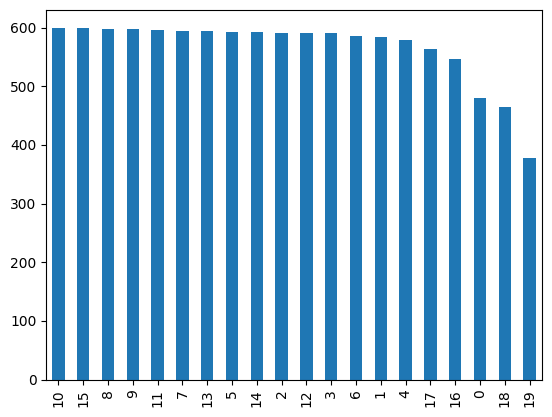

In [43]:
df.target.value_counts().plot(kind='bar')

In [ ]:
test = fetch_20newsgroups(subset='test', shuffle=True)

test

In [45]:
print(len(test))
print(len(test.data))

5
7532


In [47]:
train_article = df.article
train_target = df.target

In [64]:
test_article = test.data
test_target = test.target

In [65]:
print(len(train_article))
print(len(test_article))

11314
7532


In [66]:
tok = Tokenizer(num_words=10000) # 몇 개의 단어를 사용할 것인지 정해줄 수 있음.

In [67]:
def pre_processing_data(trainData, testData, ty): # 트레인, 테스트, 유형분류
  """
  트레인, 테스트, 유형분류
  """
  tok = Tokenizer(num_words=10000)
  tok.fit_on_texts(trainData)
  xtrain = tok.texts_to_matrix(trainData, mode=ty)
  xtest = tok.texts_to_matrix(testData, mode=ty)
  return xtrain, xtest, tok.index_word


In [68]:
xtrain, xtest, index_words = pre_processing_data(train_article, test_article, 'binary')

In [69]:
xtrain.shape # (11314, 10000)
xtest.shape  #  (7532, 10000)

(7532, 10000)

In [70]:
xtrain[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [71]:
index_words

{1: 'the',
 2: 'to',
 3: 'of',
 4: 'a',
 5: "'ax",
 6: 'and',
 7: 'in',
 8: 'i',
 9: 'is',
 10: 'that',
 11: 'it',
 12: 'for',
 13: 'you',
 14: 'from',
 15: 'edu',
 16: 'on',
 17: 'this',
 18: 'be',
 19: 'are',
 20: 'not',
 21: 'have',
 22: 'with',
 23: 'as',
 24: '1',
 25: 'or',
 26: 'was',
 27: 'if',
 28: 'but',
 29: 'subject',
 30: 'they',
 31: 'com',
 32: 'lines',
 33: 'at',
 34: 'organization',
 35: 'by',
 36: '2',
 37: 'an',
 38: 'my',
 39: 'can',
 40: 'x',
 41: '3',
 42: 'what',
 43: '0',
 44: 'all',
 45: 'will',
 46: 'm',
 47: 'there',
 48: 'would',
 49: 'one',
 50: 'do',
 51: "'",
 52: 'about',
 53: 're',
 54: 'we',
 55: 'writes',
 56: 'so',
 57: 'he',
 58: 'your',
 59: 'no',
 60: 'has',
 61: 'article',
 62: 'any',
 63: 'me',
 64: 'some',
 65: 'who',
 66: 'out',
 67: 'which',
 68: '4',
 69: 'q',
 70: 'more',
 71: 'like',
 72: 'people',
 73: "don't",
 74: 'when',
 75: '5',
 76: 'just',
 77: 'university',
 78: 'posting',
 79: 'their',
 80: 'were',
 81: 'up',
 82: 'r',
 83: 'p',


In [73]:
train_target

0         7
1         4
2         4
3         1
4        14
         ..
11309    13
11310     4
11311     3
11312     1
11313     8
Name: target, Length: 11314, dtype: int64

In [74]:
# 데이터를 신경망으로 학습하여 분류 모델 생성 ->
# xtest데이터를 모델에 입력하여 분류 20가지 결과 확인. test_target을 비교하여 정확도 계산

# train_target
ytrain = to_categorical(train_target, 20)
ytest = to_categorical(test_target, 20)

In [84]:
# 신경망 모델 만들기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential() # 빈 모델
model.add(Dense(256, input_shape=(10000,), activation='relu')) # input - hidden
model.add(Dense(128, activation='relu')) # hidden - hidden
model.add(Dense(20, activation='softmax')) # hidden - output, 출력층에서의 activation function = softmax / sigmoid
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [85]:
# 모델 훈련(트레이닝)
model.fit(xtrain, ytrain, batch_size=128, epochs=5, verbose=1, validation_split=0.1)

Epoch 1/5
80/80 [==============================] - 6s 61ms/step - loss: 1.2592 - accuracy: 0.7219 - val_loss: 0.4582 - val_accuracy: 0.8825
Epoch 2/5
80/80 [==============================] - 7s 82ms/step - loss: 0.1852 - accuracy: 0.9619 - val_loss: 0.3682 - val_accuracy: 0.8966
Epoch 3/5
80/80 [==============================] - 5s 64ms/step - loss: 0.0612 - accuracy: 0.9929 - val_loss: 0.3220 - val_accuracy: 0.9046
Epoch 4/5
80/80 [==============================] - 6s 79ms/step - loss: 0.0255 - accuracy: 0.9977 - val_loss: 0.3083 - val_accuracy: 0.9081
Epoch 5/5
80/80 [==============================] - 5s 65ms/step - loss: 0.0178 - accuracy: 0.9985 - val_loss: 0.3190 - val_accuracy: 0.9072


In [86]:
# 모델 평가
score = model.evaluate(xtest, ytest, batch_size=128, verbose=0)
score[1]

0.8149229884147644

In [89]:
temp_str = 'level'
middle = len(temp_str) // 2
result = 1

for idx in range(middle):
    if temp_str[idx] != temp_str[-1-idx]:
        result = -1
        break
print(result)

1


In [93]:
numbers = [1, 25, 3, 16, 2, 7, 8]

max_num = 0
result_idx = 0

for idx, num in enumerate(numbers):
    if max_num < num:
        max_num = num
        result_idx = idx

print(result_idx, max_num)

1 25


In [94]:
list(range(1, 5))

[1, 2, 3, 4]